<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Juan Pablo Bladinieres Martin del Campo A01793474

In [63]:
# Get Data and create csv to work localy
import requests
import os
import pandas as pd
import numpy as np

url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
path=os.path.join(os.getcwd(),'cars.csv')

df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df.to_csv(path)

In [64]:
import pandas as pd
import numpy as np

# Read from local file
#path="./cars.csv"
#df=pd.read_csv(path)

# Read online
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df=df.replace('?',np.NaN)
df["price"] = df["price"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["make"] = df["make"].astype("string")
df["fuel-type"] = df["fuel-type"].astype("string")
df["aspiration"] = df["aspiration"].astype("string")
df["num-of-doors"] = df["num-of-doors"].astype("string")
df["body-style"] = df["body-style"].astype("string")
df["drive-wheels"] = df["drive-wheels"].astype("string")
df["engine-location"] = df["engine-location"].astype("string")
df["engine-type"] = df["engine-type"].astype("string")
df["fuel-system"] = df["fuel-system"].astype("string")
df["num-of-cylinders"] = df["num-of-cylinders"].astype("string")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df.dropna(inplace=True)
df2=df.copy()

Analisis exploratorio de datos
- Resumir las caracteristicas de los datos.
- Obtener un mayor conocimiento de los datos.
- Descubrir relaciones entre variables.

Estadistica descriptiva
Agrupacion
ANOVA (analisis en varianza)
Correlación


In [65]:
# Descriptive Statistics
print(df.describe()) # Print the stats of all data (numeric) use all for all types.

# Summarize categorical data
drive_wheels_counts = df["drive-wheels"].value_counts() 
drive_wheels_counts.rename({"drive-wheels":"value_counts"},inplace=True, axis=0)
drive_wheels_counts.index.name="drive-wheels"
print(drive_wheels_counts)

        symboling  normalized-losses  wheel-base      length       width  \
count  159.000000         159.000000  159.000000  159.000000  159.000000   
mean     0.735849         121.132075   98.264151  172.413836   65.607547   
std      1.193086          35.651285    5.167416   11.523177    1.947883   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  165.650000   64.000000   
50%      1.000000         113.000000   96.900000  172.400000   65.400000   
75%      2.000000         148.000000  100.800000  177.800000   66.500000   
max      3.000000         256.000000  115.600000  202.600000   71.700000   

           height  curb-weight  engine-size        bore      stroke  \
count  159.000000   159.000000   159.000000  159.000000  159.000000   
mean    53.899371  2461.138365   119.226415    3.300126    3.236352   
std      2.268761   481.941321    30.460791    0.267336    0.294888   
min     49.400000  1488.000000 

Box plots
top to bottom:
    1.- Upper Outlier (point outside of graph)
    2.- Upper Extreme (first line) ~100%
    3.- Upper Quartile (Second line (first line of the box)) ~ 75%
    4.- Median (most repeated value) (center line) ~ 50%
    5.- Lower Quartile (third line (last line of the box)) ~ 25%
    6.- Lower Extreme (forth line) ~ 0%
    7.- Lower Outlier (point outside of graph)

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

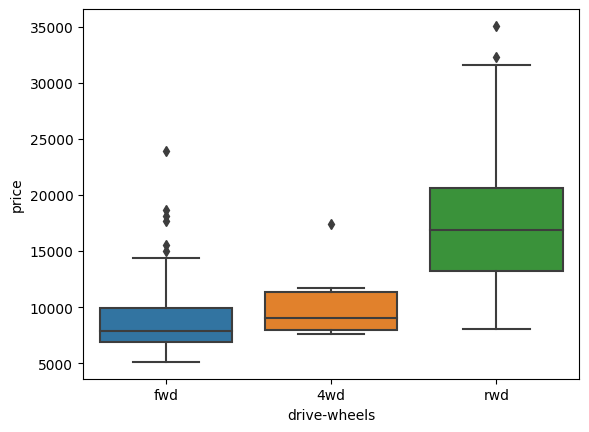

In [66]:
# Box Plot
import seaborn as sns 
sns.boxplot(x="drive-wheels", y="price",data=df)

Scatter Plot
- relation between two variables.
    - Predictor x - axis
    - Target y - axis 


Text(0, 0.5, 'Price')

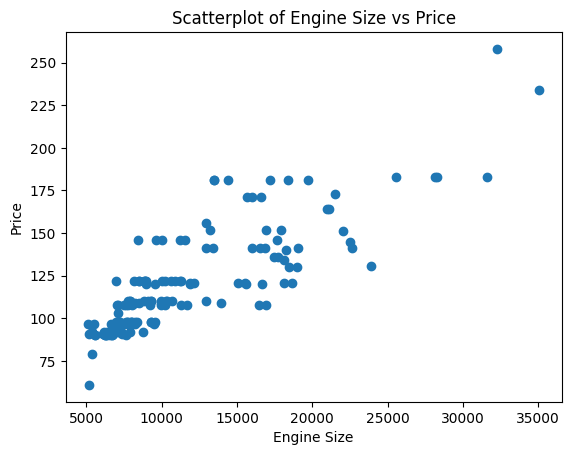

In [67]:
# Create an scatter plot
import matplotlib.pyplot as plt

y=df["engine-size"]
x=df["price"]

plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

Group By
- Use in categorical values
- By single or multiple variables

In [68]:
# Group Data
df2=df[["drive-wheels","body-style","price"]]
df3=df2.groupby(["drive-wheels","body-style"],as_index=False).mean()
print(df3)

   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd      hardtop   8249.000000
4           fwd    hatchback   7989.800000
5           fwd        sedan   9558.120000
6           fwd        wagon   8829.222222
7           rwd  convertible  26362.500000
8           rwd      hardtop  14365.750000
9           rwd    hatchback  14918.500000
10          rwd        sedan  18318.576923
11          rwd        wagon  19282.000000


Pivot
    - pivots to one varible to columns and the other to rows
    - for easy visualization.

                   price                                                    
body-style   convertible hardtop     hatchback     sedan         wagon      
drive-wheels                                                                
4wd                  NaN         NaN      7603.0  12647.333333   9095.750000
fwd                  NaN     8249.00      7989.8   9558.120000   8829.222222
rwd              26362.5    14365.75     14918.5  18318.576923  19282.000000


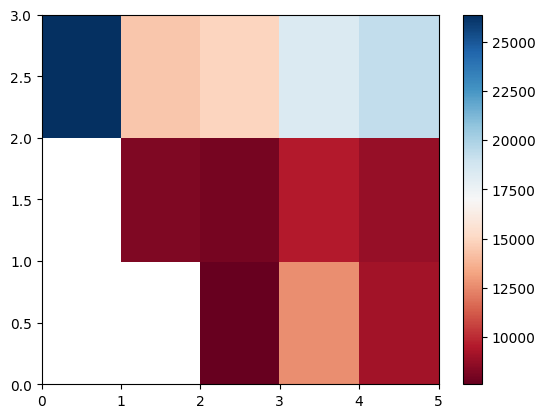

In [69]:
# Pivot table
df4=df3.pivot(index="drive-wheels",columns="body-style")
print(df4)

# Heatmaps to vizualice pivot tables
plt.pcolor(df4,cmap="RdBu")
plt.colorbar()
plt.show()


ANOVA (Analysis of Variance)
- Correlation between categorical variables.
- F-Test score = variation between sample group means diveded by variation withtin sample group.
- P-value = confidence degree.


In [70]:
# ANOVA Test
import scipy as spy

df5=df[["make","price"]]
df_ganova=df5.groupby(["make"])
anova_result=spy.stats.f_oneway(df_ganova.get_group("honda")["price"], df_ganova.get_group("subaru")["price"])
print(anova_result)
anova_result=spy.stats.f_oneway(df_ganova.get_group("honda")["price"], df_ganova.get_group("jaguar")["price"])
print(anova_result)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
F_onewayResult(statistic=126.51993543840521, pvalue=9.910636687962768e-08)


Correlation
- Variable Dependency

(0.0, 39628.417532956504)

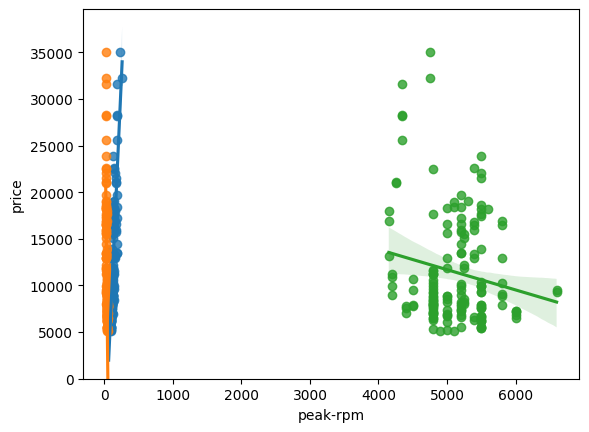

In [71]:
# Scatter Plot with regression

# Positive Correlation
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

# Negative Correlation
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

# Weak Correlation
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

Pearson Correlation
- Measure strength of correlation between two continous variables
- P-Value: less than 0.001 more correlated
- Correlation Coefficient: 0 no correlation 

 Pearson:  0.7598739453800997
 P-Value:  3.592251547712811e-31


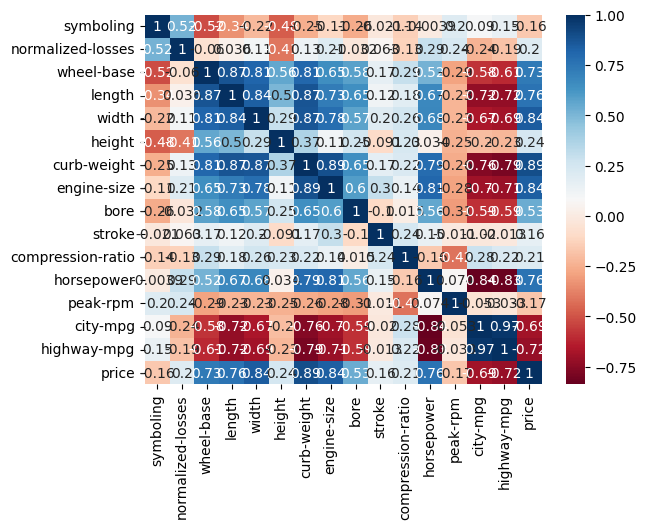

In [79]:
# Calculate Pearson Correlation
pearson,pval=spy.stats.pearsonr(df["horsepower"], df["price"])
print(" Pearson: ", pearson)
print(" P-Value: ", pval)

# Heatmap
ax=sns.heatmap(df.corr(method='pearson'), cmap='RdBu',annot=True)
plt.show()



In [82]:
# Calculate Correlation
print(df.corr())

# Get unique values of a categorical variable
print(df['drive-wheels'].unique())



                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.518344   -0.520591 -0.336257   
normalized-losses   0.518344           1.000000   -0.060086  0.035541   
wheel-base         -0.520591          -0.060086    1.000000  0.871534   
length             -0.336257           0.035541    0.871534  1.000000   
width              -0.219186           0.109726    0.814991  0.838338   
height             -0.475185          -0.413702    0.555767  0.499251   
curb-weight        -0.251880           0.125858    0.810181  0.871291   
engine-size        -0.109453           0.207820    0.649206  0.725953   
bore               -0.256469          -0.031558    0.578159  0.646318   
stroke             -0.021285           0.063330    0.167449  0.121073   
compression-ratio  -0.138316          -0.127259    0.291431  0.184814   
horsepower         -0.003949           0.290511    0.516948  0.672063   
peak-rpm            0.199106           0.237697   -

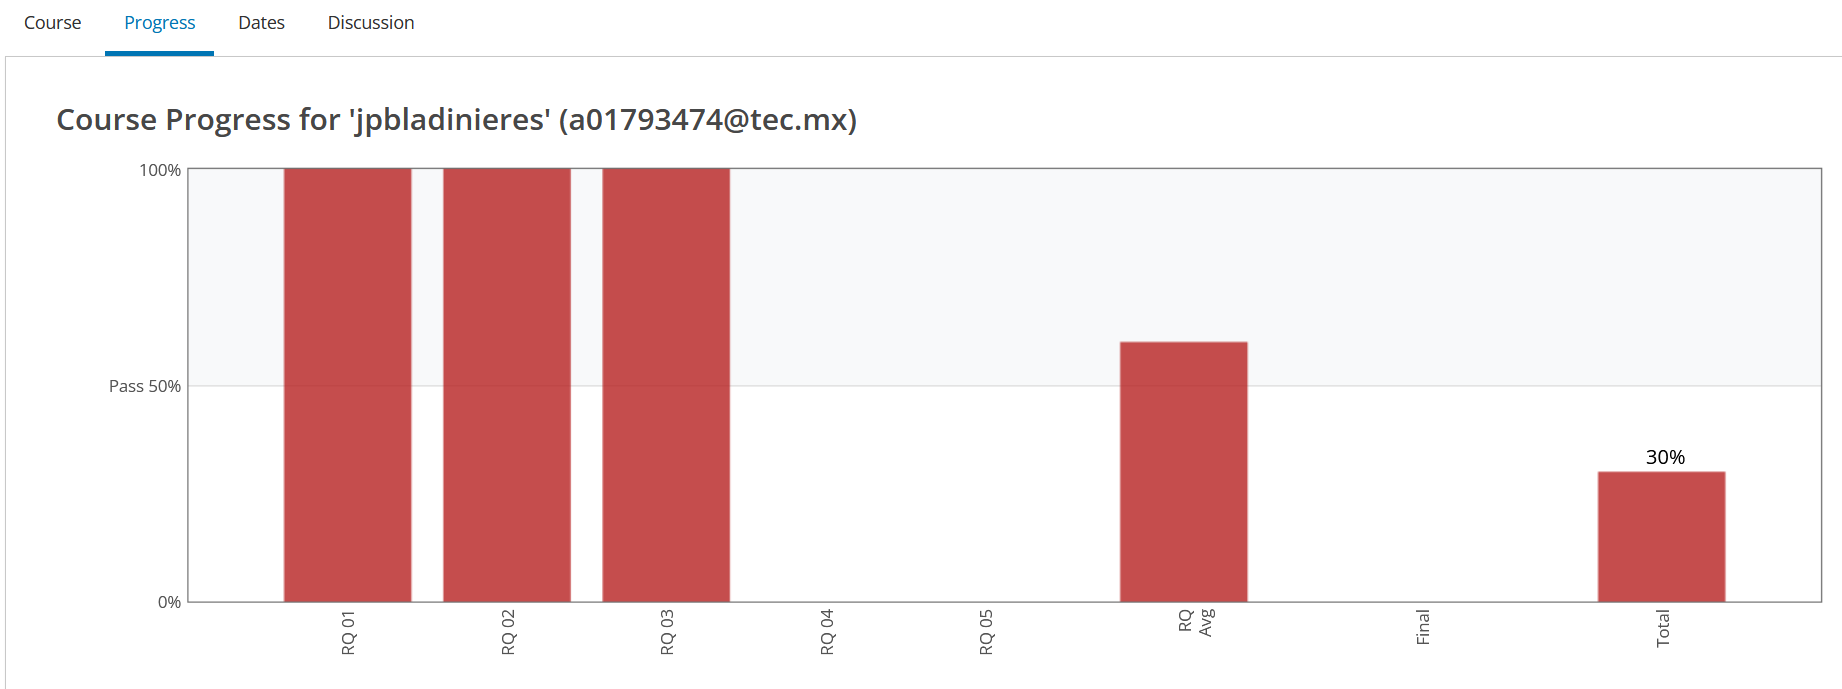

In [83]:
# Results of the Module Progress
import os 
from PIL import Image

imgpath="./progreso3DA0101EN.png"
Image.open(imgpath)  